Hola **Rafael**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te felicito por incluir esta sección introductoria ya que ayuda a entender el que y cómo de tu proyecto antes de revisar cada celda, te animo a mantener esta buena práctica!
</div>

## Preparación

In [1]:
#librerias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from statsmodels.tsa.seasonal import seasonal_decompose

<div class="alert alert-block alert-info">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Una buena práctica para cuando tengas que importar varias librerías es seguir el siguiente órden en las mismas:

- Primero todas las librerías que vienen ya con python cómo `datetime`, `os`, `json`, etc.
- Luego de las librerías de Python si las de terceros cómo `pandas`, `scipy`, `numpy`, etc.
- Por último, en el caso de que armes tu propio módulo en tu proyecto esto debería ir en tercer lugar, y recuerda siempre ordenar cada tipo por orden alfabético
    
Para cada sección se deben ordenar en orden alfabético
</div>

In [2]:
df_raw = pd.read_csv('taxi.csv',parse_dates=['datetime'], index_col=[0])

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [4]:
df_raw.head(5)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [5]:
df_clean = df_raw

In [6]:
df_clean = df_clean.resample('1H').sum()
df_clean

C:\Users\rafael\AppData\Local\Temp\ipykernel_12768\1758209374.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_clean = df_clean.resample('1H').sum()


,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


## Análisis

In [7]:
df_clean_1M = df_clean.loc[(df_clean.index.month == 6)]
df_clean_2D = df_clean.loc[(df_clean.index.month == 6) & (df_clean.index.day.isin([5, 6]))]
# se utiliza unicamente 2 meses continuos para poder ver de mejor manera la estacionalidad 

In [8]:
descom_estacional = seasonal_decompose(df_clean)
descom_estacional_1m = seasonal_decompose(df_clean_1M)
descom_estacional_2d = seasonal_decompose(df_clean_2D)

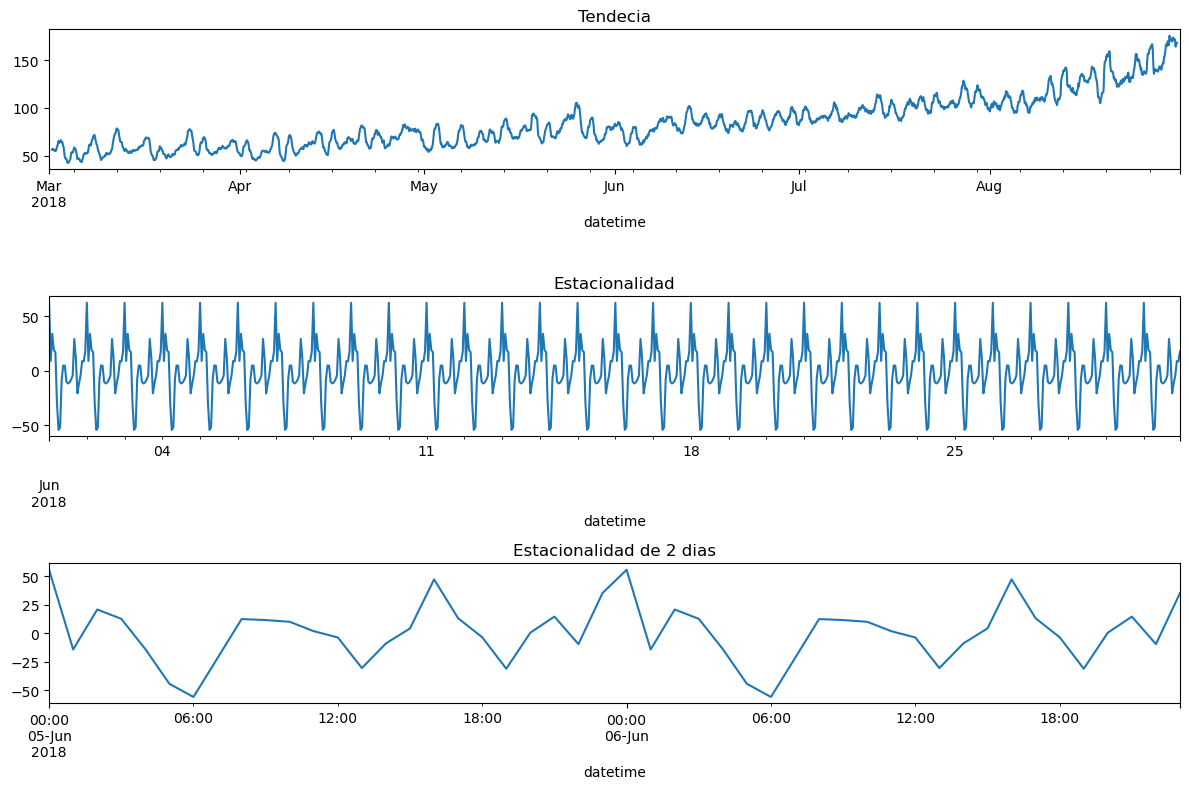

In [9]:
plt.figure(figsize=(12,8))
plt.subplot(311)
descom_estacional.trend.plot(ax=plt.gca())
plt.title('Tendecia')
plt.subplot(312)
descom_estacional_1m.seasonal.plot(ax=plt.gca())
plt.title('Estacionalidad')
plt.subplot(313)
descom_estacional_2d.seasonal.plot(ax=plt.gca())
plt.title('Estacionalidad de 2 dias')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante:</b> <a class=“tocSkip”></a>
 Como se puede apreciar la tendecia de los pedidos de servico van en aumento con respecto al primer mes, asi mismo la estacionalidad de los servicios es por dia se repiten los mismos patrones se tiene un pico maximo a las 00:00 y un minimo a las 6 am
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo, realizaste las gráficas correctas para el análisis de datos temporales y planteaste un comentario acertado sobre lo que se puede observar
</div>

## Formación

### Construccion de caracteristicas

In [10]:
def make_feactures(data,max_lag,rolling_mean_size):
    data['mes'] =data.index.month
    data['dia'] =data.index.day
    data['day_of_weak'] =data.index.dayofweek
    data['hora'] = data.index.hour
    
    for lag in range(1,max_lag+1):
         data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
    
    data['rolling_mean'] = (data['num_orders'].shift().rolling(rolling_mean_size).mean())
    

In [11]:
make_feactures(df_clean,24,24)

df_clean

,num_orders,mes,dia,day_of_weak,hora,lag_1,lag_2,lag_3,lag_4,lag_5,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,3,1,3,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,3,1,124.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,1,3,2,85.0,124.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,1,3,3,71.0,85.0,124.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,3,1,3,4,66.0,71.0,85.0,124.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,136,8,31,4,19,207.0,217.0,197.0,116.0,133.0,...,99.0,230.0,194.0,276.0,246.0,158.0,198.0,142.0,72.0,164.875000
2018-08-31 20:00:00,154,8,31,4,20,136.0,207.0,217.0,197.0,116.0,...,268.0,99.0,230.0,194.0,276.0,246.0,158.0,198.0,142.0,167.541667
2018-08-31 21:00:00,159,8,31,4,21,154.0,136.0,207.0,217.0,197.0,...,78.0,268.0,99.0,230.0,194.0,276.0,246.0,158.0,198.0,168.041667


In [12]:
df_clean.dropna(inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4392 entries, 2018-03-02 00:00:00 to 2018-08-31 23:00:00
Freq: h
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_orders    4392 non-null   int64  
 1   mes           4392 non-null   int32  
 2   dia           4392 non-null   int32  
 3   day_of_weak   4392 non-null   int32  
 4   hora          4392 non-null   int32  
 5   lag_1         4392 non-null   float64
 6   lag_2         4392 non-null   float64
 7   lag_3         4392 non-null   float64
 8   lag_4         4392 non-null   float64
 9   lag_5         4392 non-null   float64
 10  lag_6         4392 non-null   float64
 11  lag_7         4392 non-null   float64
 12  lag_8         4392 non-null   float64
 13  lag_9         4392 non-null   float64
 14  lag_10        4392 non-null   float64
 15  lag_11        4392 non-null   float64
 16  lag_12        4392 non-null   float64
 17  lag_13        4392 non-null

### Creacion de Modelos

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

In [14]:
train_valid, test = train_test_split(df_clean, shuffle=False, test_size=0.1)

In [15]:
train, valid = train_test_split(train_valid, shuffle=False, test_size=0.1)

In [16]:
train_feactures = train.drop(['num_orders'], axis = 1)
train_feactures_g = train_feactures 

test_feactures = test.drop(['num_orders'], axis = 1)
test_feactures_g = test_feactures

valid_feactures = valid.drop(['num_orders'], axis = 1)
valid_feactures_g = valid_feactures
#--------------------------------------------
train_target = train['num_orders']
train_target_g = train_target 

test_target = test['num_orders']
test_target_g = test_target 

valid_target = valid['num_orders']
valid_target_g = valid_target


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, dividiste los datos en los sets necesarios y extrajiste características extra para darle más información al modelo, esto es un paso importante para asegurar un correcto desempeño
</div>

In [17]:
global train_feactures_g , test_feactures_g, valid_feactures_g, train_target_g, test_target_g,valid_target_g

In [18]:
def rmse (real, pred):
    return math.sqrt(mean_squared_error(real,pred))

#### regrecion lineal

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model_rl = LinearRegression()

In [21]:
model_rl.fit(train_feactures,train_target)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### lgbm 

In [22]:
import lightgbm as lgb

In [23]:
model_lgb = lgb.LGBMRegressor(num_interaction = 5000,learning_rate=0.02, verbose = 1, metric ='rmse')

In [24]:
model_lgb.fit(train_feactures,train_target, eval_set=(valid_feactures,valid_target))

[LightGBM] [Warning] Unknown parameter: num_interaction
[LightGBM] [Warning] Unknown parameter: num_interaction
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000546 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4563
[LightGBM] [Info] Number of data points in the train set: 3556, number of used features: 29
[LightGBM] [Warning] Unknown parameter: num_interaction
[LightGBM] [Info] Start training from score 74.948538


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.02
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


#### Entrenamiento  catboost 

In [26]:
from catboost import Pool, CatBoostRegressor

In [31]:
model_catboost =  CatBoostRegressor(
                    iterations=5000,
                    learning_rate=0.03,
                    depth=6,
                    loss_function='RMSE',
                    eval_metric='RMSE',
                    early_stopping_rounds=100,
                    verbose=100
                    )


#train the model
model_catboost.fit(train_feactures,train_target,eval_set=(valid_feactures,valid_target))

0:	learn: 35.6334239	test: 57.4112846	best: 57.4112846 (0)	total: 147ms	remaining: 12m 15s
100:	learn: 21.7609268	test: 36.5486854	best: 36.5486854 (100)	total: 458ms	remaining: 22.2s
200:	learn: 19.8317453	test: 33.4903629	best: 33.4903629 (200)	total: 721ms	remaining: 17.2s
300:	learn: 18.5973185	test: 32.4508452	best: 32.4435837 (298)	total: 976ms	remaining: 15.2s
400:	learn: 17.5466127	test: 31.9685748	best: 31.9613232 (398)	total: 1.25s	remaining: 14.3s
500:	learn: 16.4863642	test: 31.6378848	best: 31.6249176 (485)	total: 1.51s	remaining: 13.6s
600:	learn: 15.6088655	test: 31.3313712	best: 31.3312872 (599)	total: 1.79s	remaining: 13.1s
700:	learn: 14.9139362	test: 31.2672808	best: 31.2572820 (688)	total: 2.08s	remaining: 12.7s
800:	learn: 14.2793470	test: 31.1970945	best: 31.1970945 (800)	total: 2.32s	remaining: 12.2s
900:	learn: 13.6702082	test: 31.1547144	best: 31.1442767 (894)	total: 2.58s	remaining: 11.8s
1000:	learn: 13.0889727	test: 31.0852660	best: 31.0758939 (989)	total: 2

## Prueba

In [27]:
def predict(modelo,rmse):
    
    start_time = time.time()  # Iniciar temporizador
    predict_train = modelo.predict(train_feactures_g)
    predict_test = modelo.predict(test_feactures_g)
    predict_valid = modelo.predict(valid_feactures_g)
    end_time = time.time()
    
    execution_time = end_time - start_time
    print('Entrenamiento prueba RMSE',rmse(train_target_g,predict_train))
    print('Validacion prueba RMSE',rmse(valid_target_g ,predict_valid))
    print('Test prueba RMSE',rmse(test_target_g,predict_test))
    print('Tiempo de ejecucion', execution_time)
    return 

In [28]:
predict(model_rl,rmse)

Entrenamiento prueba RMSE 24.59940597950347
Validacion prueba RMSE 34.19955551311371
Test prueba RMSE 46.2848009737359
Tiempo de ejecucion 0.004742145538330078


In [29]:
predict(model_lgb,rmse)

[LightGBM] [Warning] Unknown parameter: num_interaction
[LightGBM] [Warning] Unknown parameter: num_interaction
[LightGBM] [Warning] Unknown parameter: num_interaction
Entrenamiento prueba RMSE 19.26516479877034
Validacion prueba RMSE 34.664159524446845
Test prueba RMSE 54.912844070964255
Tiempo de ejecucion 0.00893092155456543


In [32]:
predict(model_catboost,rmse)

Entrenamiento prueba RMSE 11.926492592654816
Validacion prueba RMSE 30.937880466121378
Test prueba RMSE 47.75369110136289
Tiempo de ejecucion 0.00961160659790039


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
Como se puede observar el mejor modelo es el lgb ya que cuenta con el menor error posible asi como un tiempo razonable tanto en la ejecucion del entrenamiento como enn la ejecucion de testeo en comparacion con los demas modelos. tomando como en cuneta el modelo de bosque aleatorio que este tiene un  tiempo elevado de ejecucion en el entrenam 
</div>

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te felicito por el trabajo realizado Rafael, aplicaste los procesos adecuados al dataset para darle características nuevas al modelo, con ese proceso aportas significativamente al desempeño del mismo y obtuviste una métrica que supera lo propuesto para este proyecto, continúa con este gran trabajo!
</div>

# Lista de revisión

- [x]  	
Jupyter Notebook está abierto.
- [ ]  El código no tiene errores
- [ ]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [ ]  	
Los datos han sido descargados y preparados.
- [ ]  Se ha realizado el paso 2: los datos han sido analizados
- [ ]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [ ]  Se han evaluado los modelos. Se expuso una conclusión
- [ ] La *RECM* para el conjunto de prueba no es más de 48